In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
file_path = "Students Social Media Addiction.csv"
df = pd.read_csv(file_path)

In [3]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (705, 13)


In [4]:
print("Dataset Information: ")
print(df.info())

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null

In [5]:
print("First 5 Rows: ")
print(df.head(5))

First 5 Rows: 
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Con

In [6]:
print("Descriptive Statistics: ")
print(df.describe(include='all'))

Descriptive Statistics: 
        Student_ID         Age  Gender Academic_Level Country  \
count   705.000000  705.000000     705            705     705   
unique         NaN         NaN       2              3     110   
top            NaN         NaN  Female  Undergraduate   India   
freq           NaN         NaN     353            353      53   
mean    353.000000   20.659574     NaN            NaN     NaN   
std     203.660256    1.399217     NaN            NaN     NaN   
min       1.000000   18.000000     NaN            NaN     NaN   
25%     177.000000   19.000000     NaN            NaN     NaN   
50%     353.000000   21.000000     NaN            NaN     NaN   
75%     529.000000   22.000000     NaN            NaN     NaN   
max     705.000000   24.000000     NaN            NaN     NaN   

        Avg_Daily_Usage_Hours Most_Used_Platform Affects_Academic_Performance  \
count              705.000000                705                          705   
unique                    NaN   

In [7]:
print("Missing Values: ")
print(df.isnull().sum())

Missing Values: 
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [8]:
print("Column Data Types: ")
print(df.dtypes)

Column Data Types: 
Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object


In [9]:
print("Unique Values per Categorical Column: ")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Unique Values per Categorical Column: 
Gender: ['Female' 'Male']
Academic_Level: ['Undergraduate' 'Graduate' 'High School']
Country: ['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland' 'Poland'
 'Romania' 'Hungary' 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia'
 'Slovenia' 'Bulgaria' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova'
 'Belarus' 'Kazakhstan' 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan' 'Armenia'
 'Georgia' 'Azerbaijan' 'Cyprus

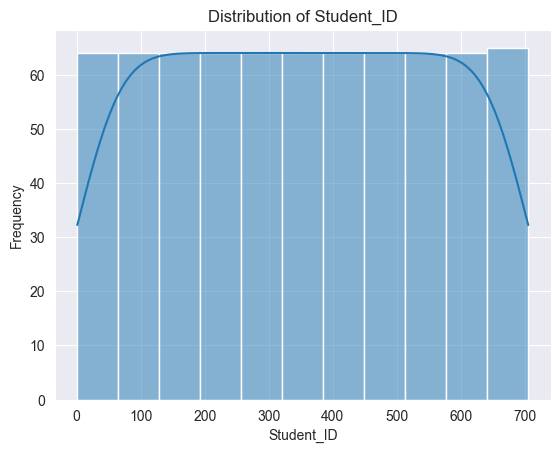

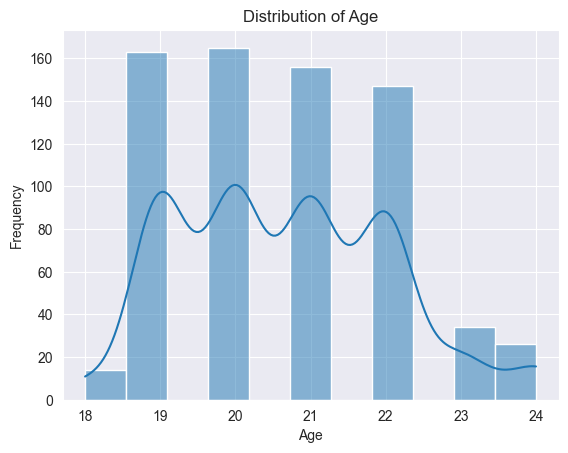

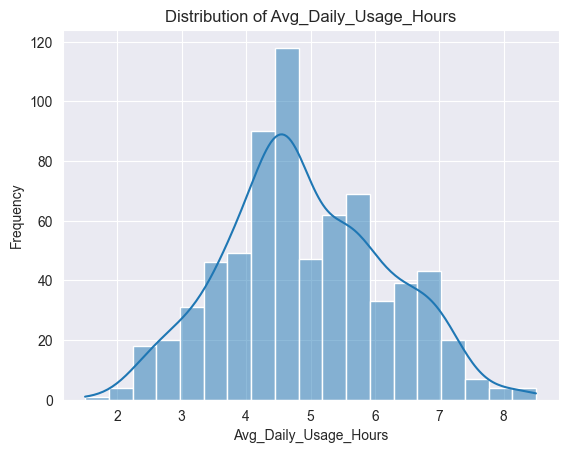

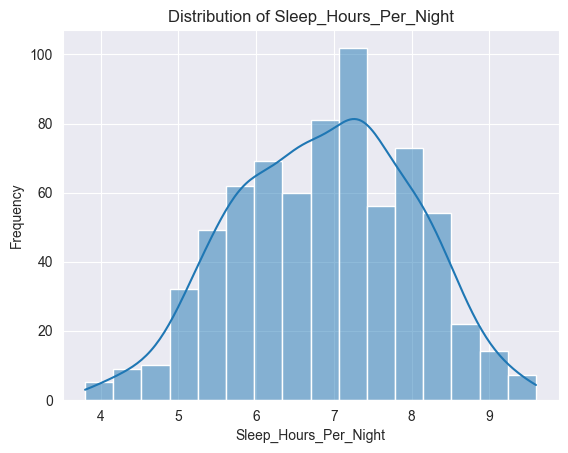

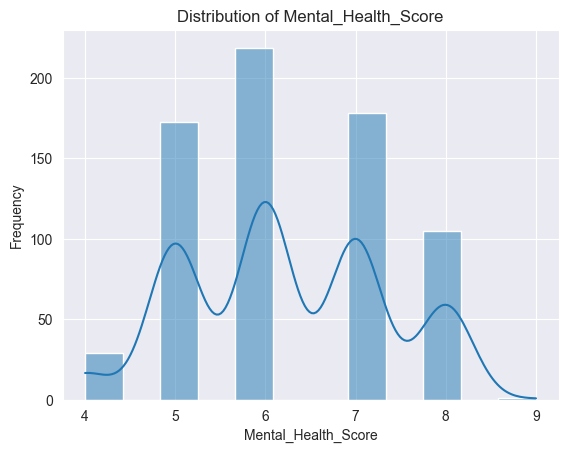

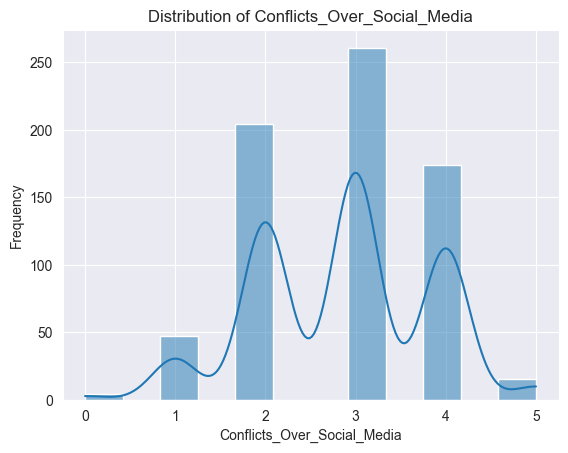

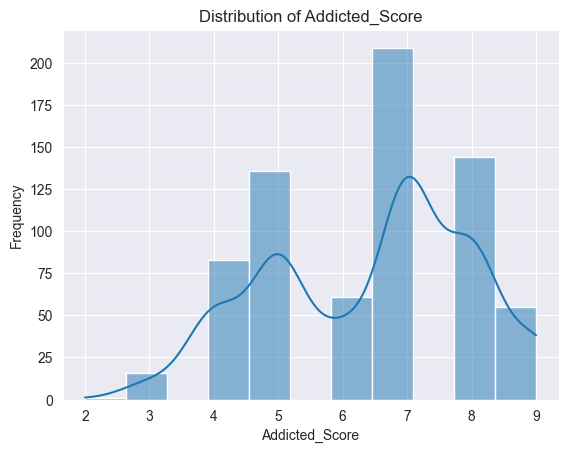

In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

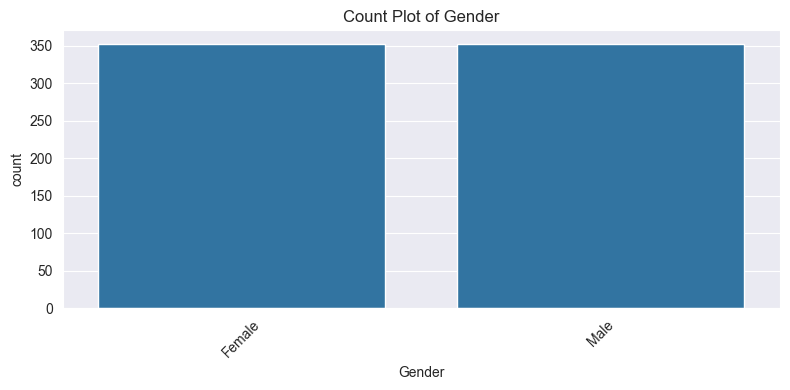

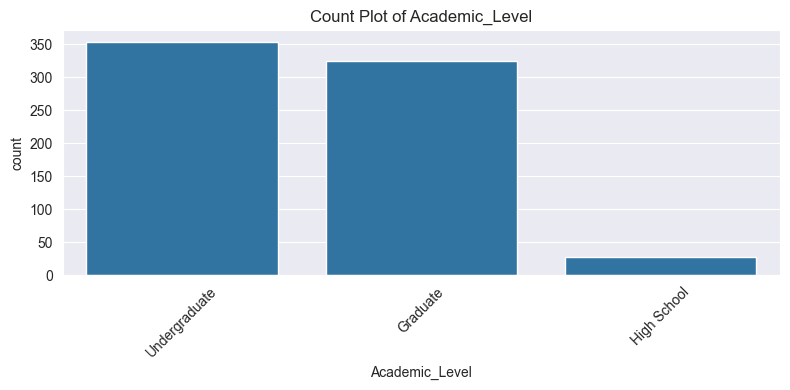

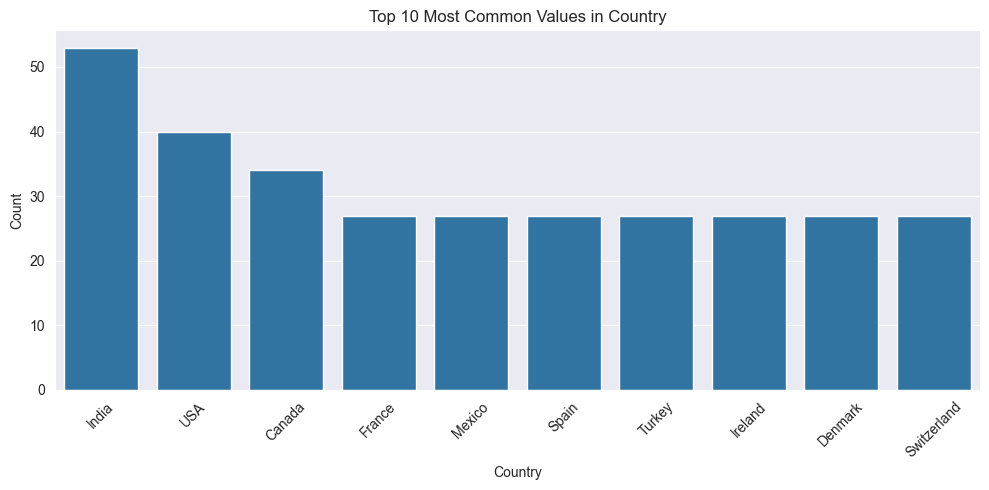

[INFO] Skipped plotting all 110 unique values in 'Country'. Showing top 10 only.


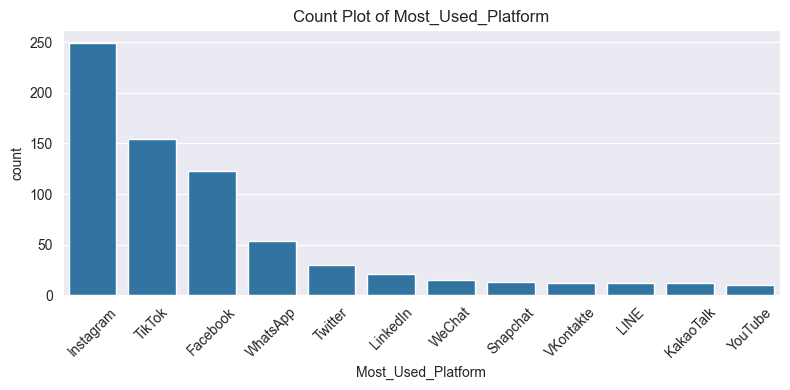

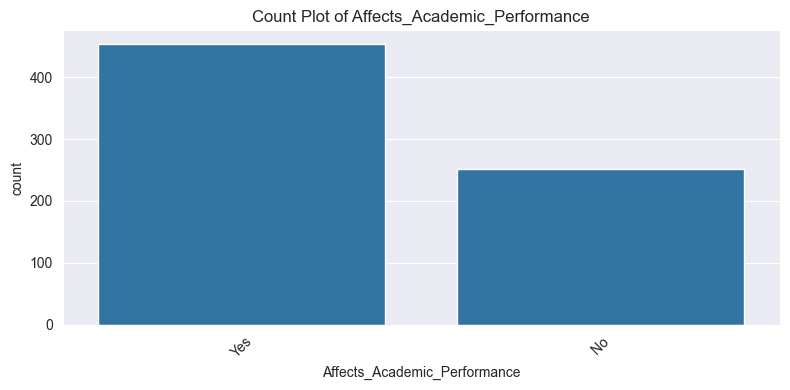

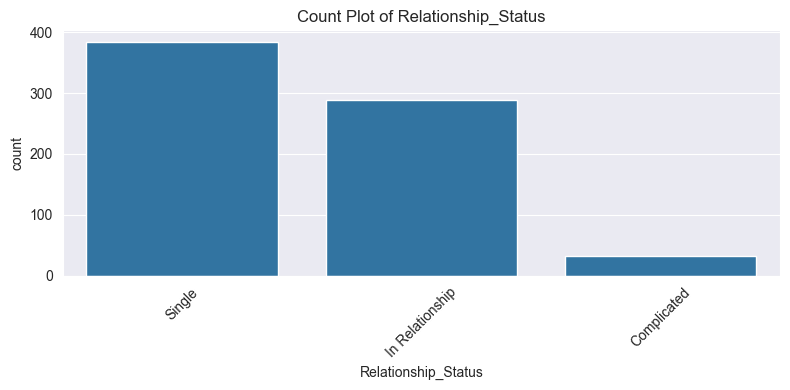

In [11]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    unique_vals = df[col].nunique()

    if unique_vals <= 20:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    elif unique_vals > 20:
        top_categories = df[col].value_counts().nlargest(10)
        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.title(f'Top 10 Most Common Values in {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"[INFO] Skipped plotting all {unique_vals} unique values in '{col}'. Showing top 10 only.")

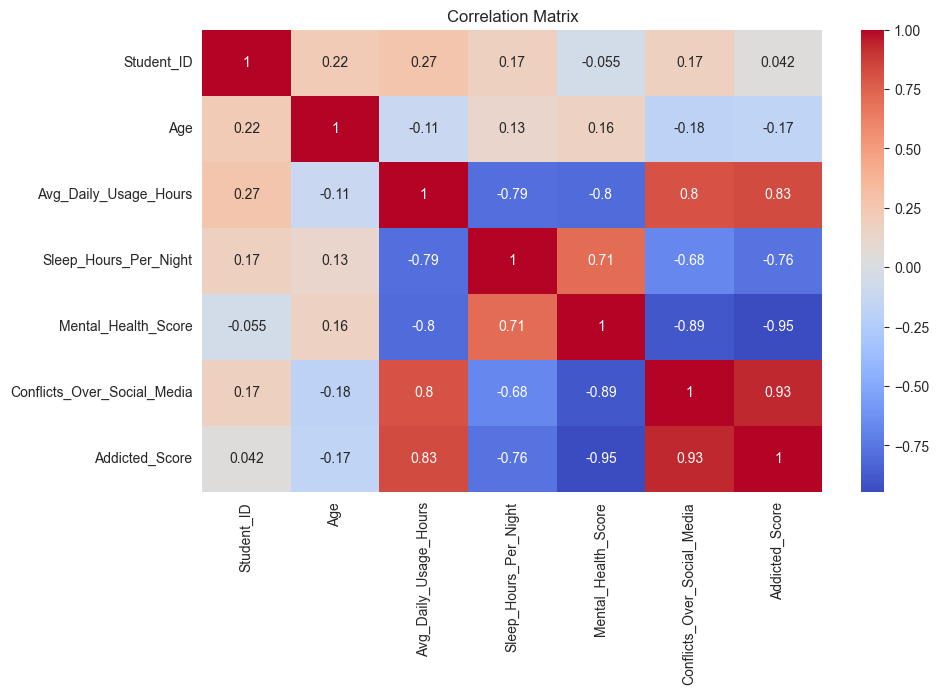

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
df = df.drop(columns=["Student_ID"])

In [14]:
print("Dataset Information: ")
print(df.info())

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Country                       705 non-null    object 
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    object 
 6   Affects_Academic_Performance  705 non-null    object 
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    object 
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory 

In [15]:
academic_order = {'High School': 1, 'Undergraduate': 2, 'Graduate': 3}
df['Academic_Level_encoded'] = df['Academic_Level'].map(academic_order)

In [16]:
df['Affects_Academic_Performance_encoded'] = df['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

In [17]:
df = pd.get_dummies(df, columns=[
    'Gender',
    'Country',
    'Most_Used_Platform',
    'Relationship_Status'
], drop_first=True, dtype=int) # Set drop_first=False for tree-based models

In [18]:
df.drop(['Academic_Level', 'Affects_Academic_Performance'], axis=1, inplace=True)

In [19]:
df.head(5)

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Academic_Level_encoded,Affects_Academic_Performance_encoded,Gender_Male,Country_Albania,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
0,19,5.2,6.5,6,3,8,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,22,2.1,7.5,8,0,3,3,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,20,6.0,5.0,5,4,9,2,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,18,3.0,7.0,7,1,4,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,21,4.5,6.0,6,2,7,3,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
print(df.columns.tolist())

['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score', 'Academic_Level_encoded', 'Affects_Academic_Performance_encoded', 'Gender_Male', 'Country_Albania', 'Country_Andorra', 'Country_Argentina', 'Country_Armenia', 'Country_Australia', 'Country_Austria', 'Country_Azerbaijan', 'Country_Bahamas', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Belarus', 'Country_Belgium', 'Country_Bhutan', 'Country_Bolivia', 'Country_Bosnia', 'Country_Brazil', 'Country_Bulgaria', 'Country_Canada', 'Country_Chile', 'Country_China', 'Country_Colombia', 'Country_Costa Rica', 'Country_Croatia', 'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark', 'Country_Ecuador', 'Country_Egypt', 'Country_Estonia', 'Country_Finland', 'Country_France', 'Country_Georgia', 'Country_Germany', 'Country_Ghana', 'Country_Greece', 'Country_Hong Kong', 'Country_Hungary', 'Country_Iceland', 'Country_India', 'Country_Indonesia', 'Country_Iraq', 'Cou

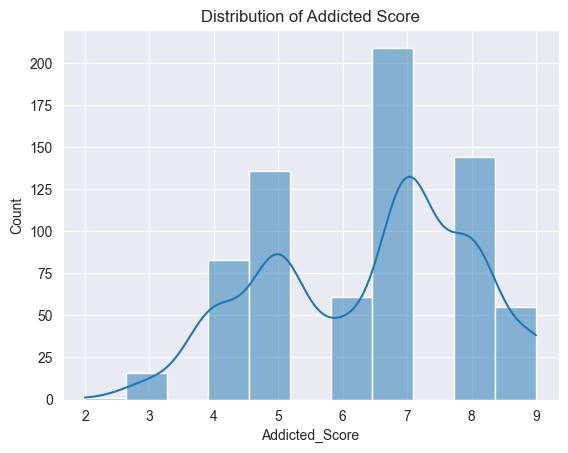

In [21]:
sns.histplot(df['Addicted_Score'], kde=True)
plt.title('Distribution of Addicted Score')
plt.show()

In [22]:
print("Skewness:", df['Addicted_Score'].skew())
print("Kurtosis:", df['Addicted_Score'].kurt())

Skewness: -0.2968284852454909
Kurtosis: -0.8944829047514808


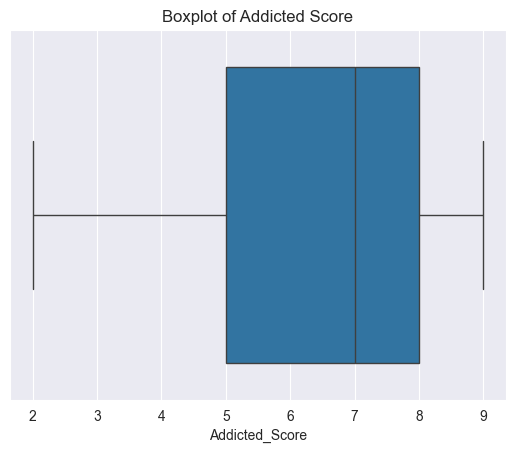

In [23]:
sns.boxplot(x=df['Addicted_Score'])
plt.title('Boxplot of Addicted Score')
plt.show()

In [24]:
correlations = df.corr(numeric_only=True)['Addicted_Score'].sort_values(ascending=False)
print(correlations)

Addicted_Score                          1.000000
Conflicts_Over_Social_Media             0.933586
Affects_Academic_Performance_encoded    0.866049
Avg_Daily_Usage_Hours                   0.832000
Country_USA                             0.334492
                                          ...   
Most_Used_Platform_LINE                -0.285151
Most_Used_Platform_LinkedIn            -0.290260
Country_Japan                          -0.327085
Sleep_Hours_Per_Night                  -0.764858
Mental_Health_Score                    -0.945051
Name: Addicted_Score, Length: 131, dtype: float64


In [25]:
X = df.drop('Addicted_Score', axis=1)
y = df['Addicted_Score']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [31]:
X_train_scaled.shape

(564, 130)

In [30]:
class TransformerRegressor(nn.Module):
    def __init__(
        self,
        seq_len,
        d_model=64,
        nhead=8,
        num_layers=2,
        dim_feedforward=128,
        dropout=0.1,
    ):
        super().__init__()
        self.seq_len = seq_len
        self.token_proj = nn.Linear(1, d_model)

        self.pos_emb = nn.Parameter(torch.zeros(1, seq_len, d_model))
        nn.init.trunc_normal_(self.pos_emb, std=0.02)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            activation="gelu",
            batch_first=True,
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)

        self.head = nn.Sequential(
            nn.Linear(d_model, d_model // 2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(d_model // 2, 1),
        )

    def forward(self, x):
        x = x.unsqueeze(-1)
        x = self.token_proj(x)
        x = x + self.pos_emb[:, :x.size(1), :]
        x = self.encoder(x)
        x = self.norm(x)
        x = x.mean(dim=1)
        return self.head(x)

In [32]:
input_size = X_train_scaled.shape[1]
model = TransformerRegressor(seq_len=input_size, d_model=64, nhead=8, num_layers=2, dim_feedforward=128, dropout=0.1)
print(f"Model architecture:\n{model}")

Model architecture:
TransformerRegressor(
  (token_proj): Linear(in_features=1, out_features=64, bias=True)
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=128, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=128, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (head): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): GELU(approximate='none')
    (2): Dropo

In [33]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 250
batch_size = 32

In [34]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [35]:
train_losses = []
model.train()

TransformerRegressor(
  (token_proj): Linear(in_features=1, out_features=64, bias=True)
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=128, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=128, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (head): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): GELU(approximate='none')
    (2): Dropout(p=0.1, inplace=Fa

In [36]:
for epoch in range(epochs):
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

Epoch [20/250], Loss: 0.5010
Epoch [40/250], Loss: 0.3696
Epoch [60/250], Loss: 0.3347
Epoch [80/250], Loss: 0.2824
Epoch [100/250], Loss: 0.2515
Epoch [120/250], Loss: 0.2400
Epoch [140/250], Loss: 0.2728
Epoch [160/250], Loss: 0.2586
Epoch [180/250], Loss: 0.2402
Epoch [200/250], Loss: 0.2167
Epoch [220/250], Loss: 0.2278
Epoch [240/250], Loss: 0.1946


In [37]:
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_train_pred_tensor = model(X_train_tensor)

In [38]:
y_pred = y_pred_tensor.numpy().flatten()
y_train_pred = y_train_pred_tensor.numpy().flatten()

In [39]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Test R² score: {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")

Test R² score: 0.9745
Test RMSE: 0.2524
Test MAE: 0.1532


In [40]:
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train R² score: {r2_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Train MAE: {mae_train:.4f}")

Train R² score: 0.9872
Train RMSE: 0.1798
Train MAE: 0.1173


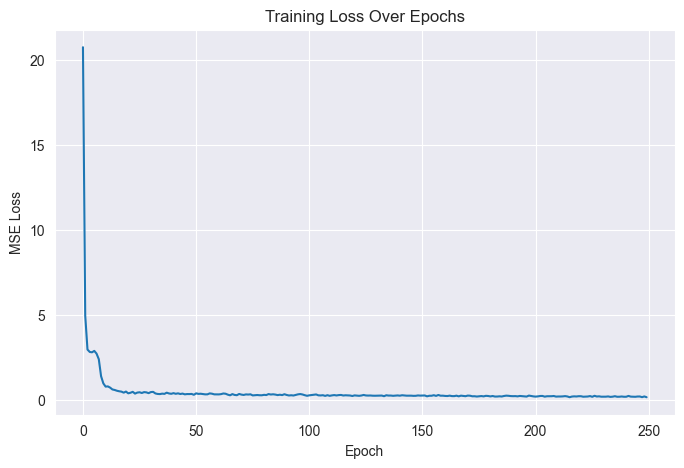

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

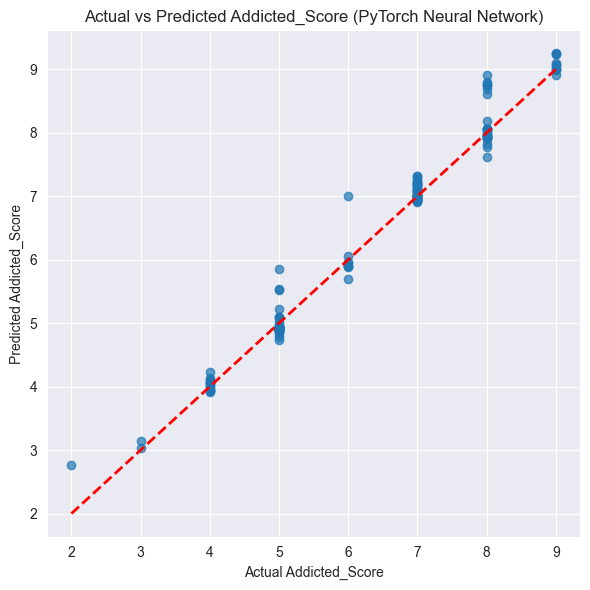

In [42]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Addicted_Score')
plt.ylabel('Predicted Addicted_Score')
plt.title('Actual vs Predicted Addicted_Score (PyTorch Neural Network)')
plt.tight_layout()
plt.show()